In [1]:
import pandas as pd

# docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
# print(len(docs))
data_1 = pd.read_csv('./data_test/vnexpress-p1-12092023.csv')
baomoi = pd.read_csv('./data_test/baomoi12092023.csv')
data_2 = pd.read_csv('./data_test/data.csv')
data_3 = pd.read_csv('./data_test/2023-09-18-17-31-13_9GLZYsdwHJ_vnexpress.net.csv')
data_4 = pd.read_csv('./data_test/2023-09-19-11-27-57_zwqWUccPpj_vnexpress.net.csv')
data_5 = pd.read_csv('./data_test/2023-09-19-14-40-54_iQexLTB60F_vnexpress.net.csv')

papers = pd.concat([data_1, data_2,data_3,data_4,data_5, baomoi], ignore_index=True)

papers = papers.drop(columns=['description'], axis=1)
papers.rename(columns={'body': 'paper_text'}, inplace=True)
# convert type of column
papers['paper_text'] = papers['paper_text'].astype(str)
# Print head
print(papers.head())
print(papers.shape)

                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
3  Hai thanh niên đánh tài xế cướp tài sản - VnEx...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
3                                                nan  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  
(397, 2)


In [2]:

# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())

                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
3  Hai thanh niên đánh tài xế cướp tài sản - VnEx...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
3                                                nan  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  


In [3]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    rubio sinh sống và làm việc trên trạm vũ trụ q...
1    hoài thanh hiện làm công việc kinh doanh tại k...
2    trang tin chuyên về billiards kozoom giật tít:...
3                                                  nan
4    tối muốn bán xe vinfast fadil bản tiêu chuẩn 2...
Name: paper_text_processed, dtype: object

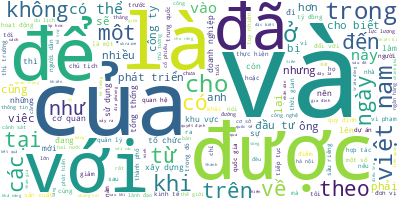

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # Sử dụng str.maketrans và translate để loại bỏ dấu câu
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    return ViTokenizer.tokenize(text) 

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(remove_punctuation_underscore(str(sentence)))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed'].apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
# text = data[0]
# print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# from sentence_transformers import SentenceTransformer
# sentence_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

### contextualized-topic-models

In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.data_preparation import bert_embeddings_from_file

qt = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset = qt.fit(text_for_contextual=papers['paper_text'].tolist(), text_for_bow=docs)

ctm = CombinedTM(bow_size=len(qt.vocab), contextual_size=768, n_components=50) # 50 topics

ctm.fit(training_dataset) # run the model

ctm.get_topics(2)

In [8]:
print(ctm.get_topics())

defaultdict(<class 'list'>, {0: ['phú', 'tổng_thống', 'nguyễn', 'trọng', 'tổng_bí_thư', 'biden', 'chủ_tịch', 'hòa', 'lãnh_đạo', 'joe'], 1: ['đối_tượng', 'bắt_giữ', 'điều_tra', 'hình_sự', 'ma_túy', 'trú', 'khởi_tố', 'trai', 'thu_giữ', 'ubnd'], 2: ['phát_ngôn_viên', 'eu', 'láng_giềng', 'âu', 'đơn_phương', 'hungary', 'slovakia', 'liên_bang', 'hạt_nhân', 'cấm'], 3: ['gà', 'ghế', 'khí_tượng', 'con_cái', 'xà_lách', 'út', 'thủy_văn', 'nhiệt_đới', 'ngã', 'trứng'], 4: ['du_lịch', 'dịch_vụ', 'quảng_ninh', 'giúp', 'địa_phương', 'dầu', 'sự_kiện', 'đường', 'tuyến', 'vinpearl'], 5: ['mẫu', 'khởi_hành', 'ra_mắt', 'vinfast', 'chật', 'truyền_hình', 'bất_chấp', 'pin', 'động_cơ', 'santa'], 6: ['vay', 'ngân_hàng', 'đầu', 'khoản', 'cũ', 'hà', 'tài_sản', 'nợ', 'đi', 'bắt'], 7: ['tiến_trình', 'pin', 'mah', 'grand', 'thập_kỷ', 'desmarque', 'garros', 'vĩ_đại', 'truyền', 'roland'], 8: ['xét_nghiệm', 'nguyên_nhân', 'bệnh_viện', 'tử_vong', 'tiêm', 'chuyển_hóa', 'cháu', 'sơ_sinh', 'trú', 'đty'], 9: ['vay', 'tài_sả